# CAR PRICE PREDICTION

**Permasalahan**

Sebuah perusahaan mobil Cina Geely Auto bercita-cita untuk memasuki pasar AS dengan mendirikan unit manufaktur mereka di sana dan memproduksi mobil secara lokal untuk memberikan persaingan kepada rekan-rekan mereka di AS dan Eropa.

Mereka telah mengontrak sebuah perusahaan konsultan mobil untuk memahami faktor-faktor yang menjadi dasar penentuan harga mobil. Secara khusus, mereka ingin memahami faktor-faktor yang mempengaruhi harga mobil di pasar Amerika, karena mungkin sangat berbeda dari pasar Cina. Perusahaan ingin tahu:

- Variabel mana yang signifikan dalam memprediksi harga mobil
- Seberapa baik variabel tersebut menggambarkan harga mobil

Berdasarkan berbagai survei pasar, perusahaan konsultan telah mengumpulkan dataset besar dari berbagai jenis mobil di pasar Amerika.

**Business Goal**

Project ini diminta untuk memodelkan harga mobil dengan variabel independen yang tersedia. Ini akan digunakan oleh manajemen untuk memahami bagaimana sebenarnya harga bervariasi dengan variabel independen. Mereka dapat memanipulasi desain mobil, strategi bisnis, dll. untuk memenuhi tingkat harga tertentu. Selanjutnya, model tersebut akan menjadi cara yang baik bagi manajemen untuk memahami dinamika harga pasar baru.

**IMPORT LIBRARY**

In [1]:
import warnings
warnings.filterwarnings('ignore')

#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 1: Reading and Understanding the Data**

In [2]:
cars = pd.read_csv('D:/TUGAS KULIAH/DATASET BELAJAR DATA SCIENCE/CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars.shape

(205, 26)

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**Step 2 : Data Cleaning and Preparation**

In [6]:
#splitting company name dari car name
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3, 'CompanyName', CompanyName)
cars.drop(['CarName'], axis=1, inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
cars.CompanyName.nunique()

28

In [8]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a, b) :
    cars.CompanyName.replace(a, b, inplace=True)
    
replace_name('maxda', 'mazda')
replace_name('porcshce', 'porsche')
replace_name('toyouta', 'toyota')
replace_name('vokswagen', 'volkswagen')
replace_name('vw', 'volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
#checking duplicates
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [11]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

**Step 3: Visualizing the data**

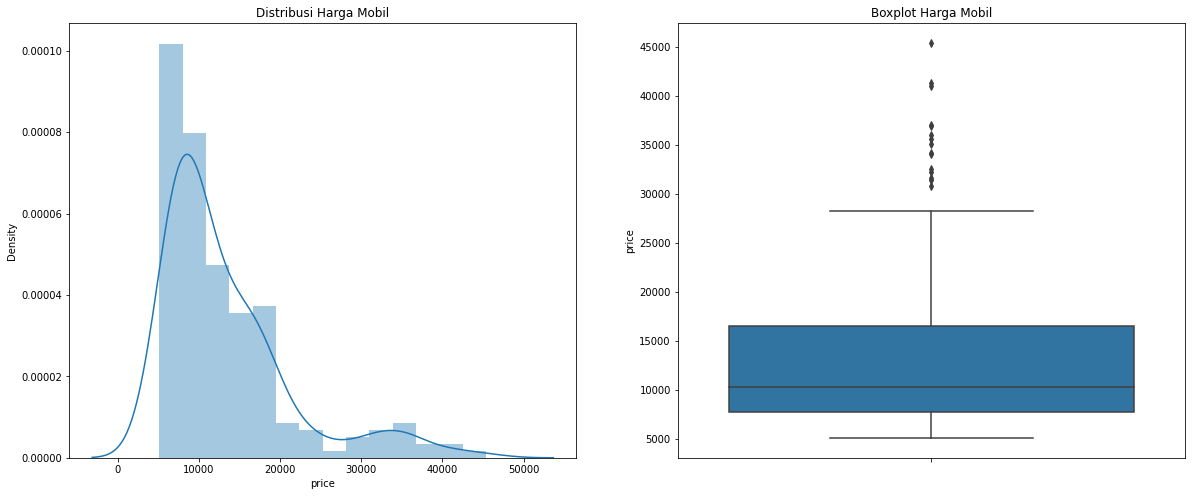

In [12]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribusi Harga Mobil')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Boxplot Harga Mobil')
sns.boxplot(y=cars.price)

plt.show()

In [13]:
print(cars.price.describe(percentiles = [0.25, 0.50, 0.75, 0.85, 0.90, 1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


Hasil:

1. Plot tampaknya miring ke kanan, artinya sebagian besar harga dalam kumpulan data rendah (Di bawah 15.000).
2. Ada perbedaan yang signifikan antara mean dan median dari distribusi harga.
3. Titik-titik data tersebar jauh dari rata-rata, yang menunjukkan perbedaan yang tinggi dalam harga mobil. (85% dari harga di bawah 18.500, sedangkan 15% sisanya antara 18.500 dan 45.400.)

**Step 3.1 : Visualising Categorical Data**

- CompanyName
- Symboling
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel

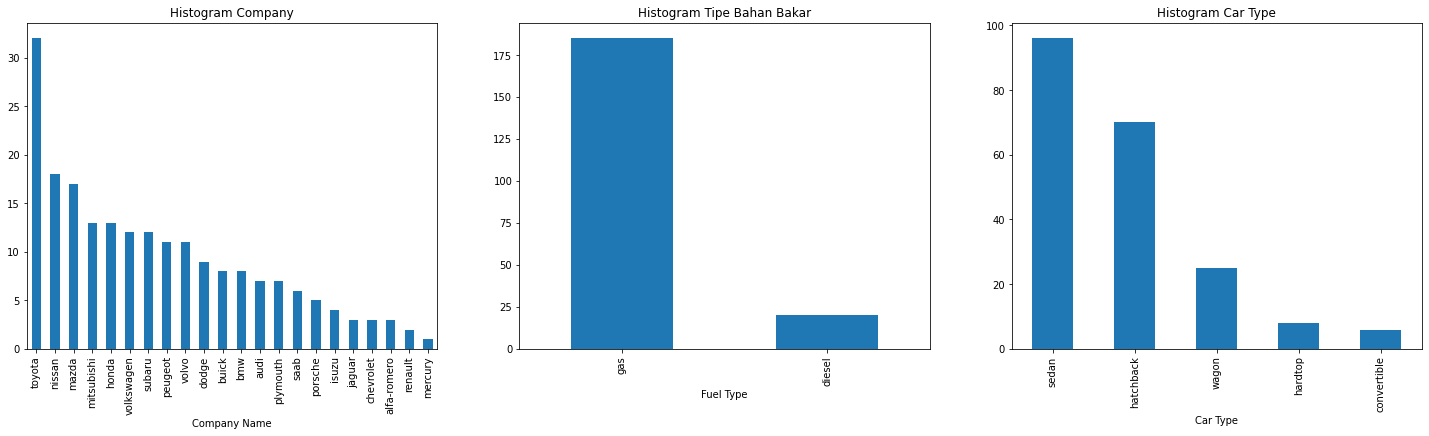

In [14]:
plt.figure(figsize = (25, 6))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind='bar')
plt.title('Histogram Company')
plt1.set(xlabel ='Company Name')

plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot(kind='bar')
plt.title('Histogram Tipe Bahan Bakar')
plt1.set(xlabel ='Fuel Type')

plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot(kind='bar')
plt.title('Histogram Car Type')
plt1.set(xlabel ='Car Type')

plt.show()

Hasil :
    
1. Toyota sepertinya menjadi perusahaan mobil yang diunggulkan.
2. Jumlah mobil berbahan bakar gas lebih banyak dari solar.
3. Sedan adalah jenis mobil teratas yang disukai.

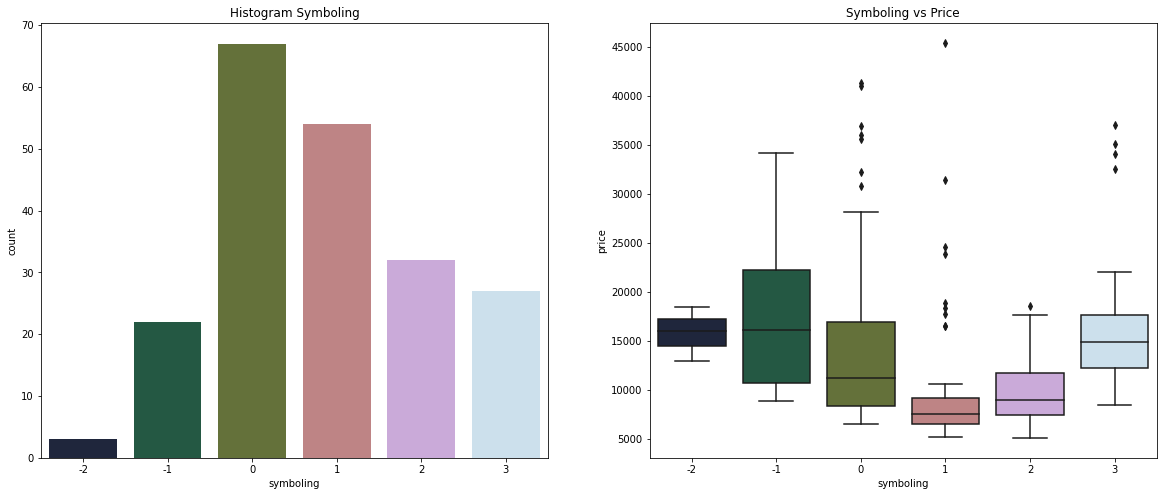

In [15]:
plt.figure(figsize = (20, 8))

plt.subplot(1,2,1)
plt.title('Histogram Symboling')
sns.countplot(cars.symboling, palette=('cubehelix'))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x = cars.symboling, y = cars.price, palette=('cubehelix'))

plt.show()

Hasil :

1. Tampaknya simbol dengan nilai 0 dan 1 memiliki jumlah baris yang tinggi (yaitu paling banyak terjual.)
2. Mobil dengan simbol -1 tampaknya memiliki harga tinggi (karena masuk akal juga, peringkat risiko asuransi -1 cukup bagus). Namun sepertinya simbol dengan nilai 3 memiliki kisaran harga yang hampir sama dengan nilai -2. Ada penurunan harga di simbol 1.

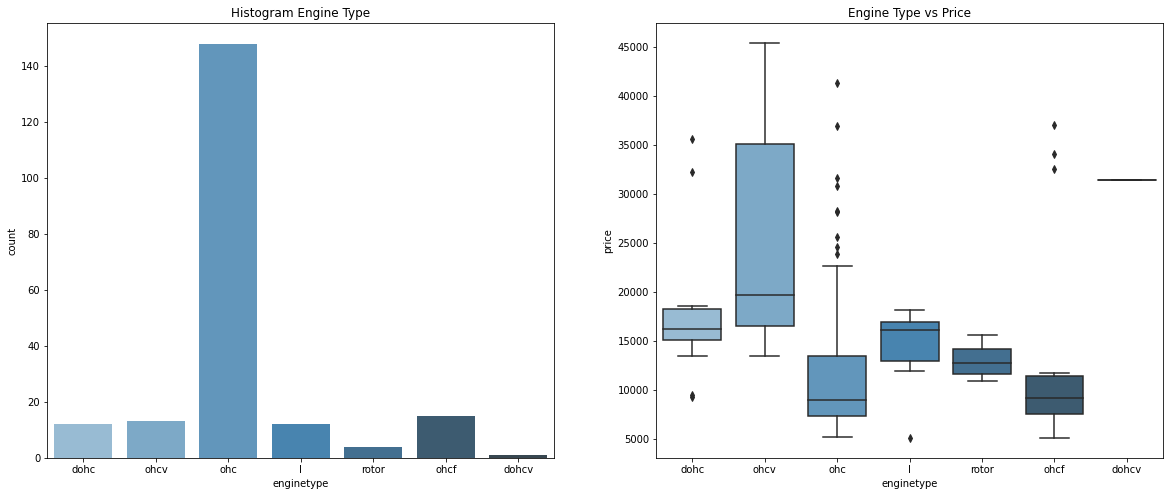

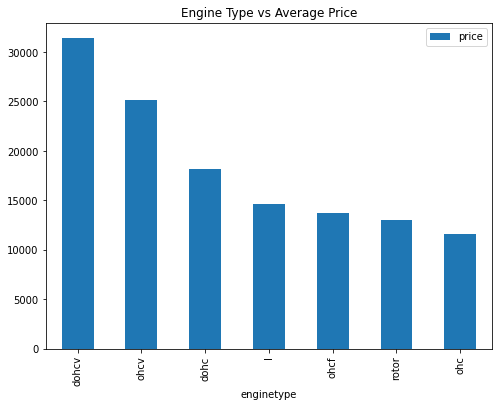

In [16]:
plt.figure(figsize = (20, 8))

plt.subplot(1,2,1)
plt.title('Histogram Engine Type')
sns.countplot(cars.enginetype, palette=('Blues_d'))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x = cars.enginetype, y = cars.price, palette=('Blues_d'))

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending=False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

Hasil :

1. ohc tampaknya menjadi jenis yang paling disukai.
2. ohcv memiliki kisaran harga tertinggi (Sementara dohcv hanya memiliki satu baris), ohc dan ohcf memiliki kisaran harga rendah.

<Figure size 1800x432 with 0 Axes>

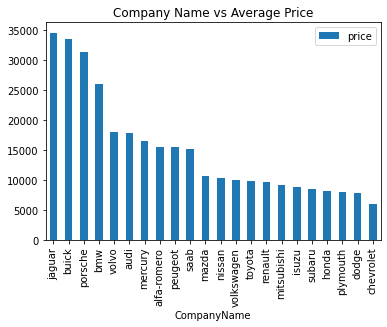

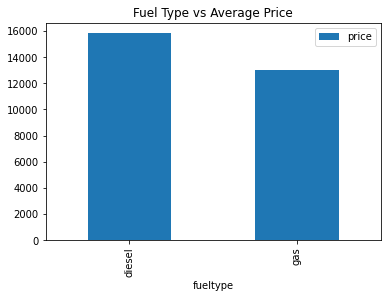

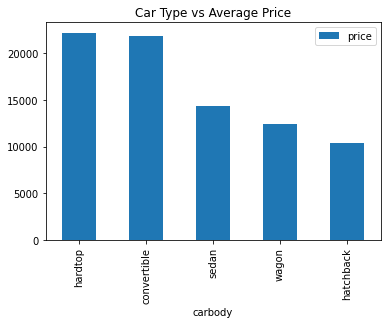

In [17]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

Hasil :
1. Jaguar dan Buick tampaknya memiliki harga rata-rata tertinggi.
2. solar memiliki harga rata-rata yang lebih tinggi daripada gas.
3. hardtop dan convertible memiliki harga rata-rata yang lebih tinggi.

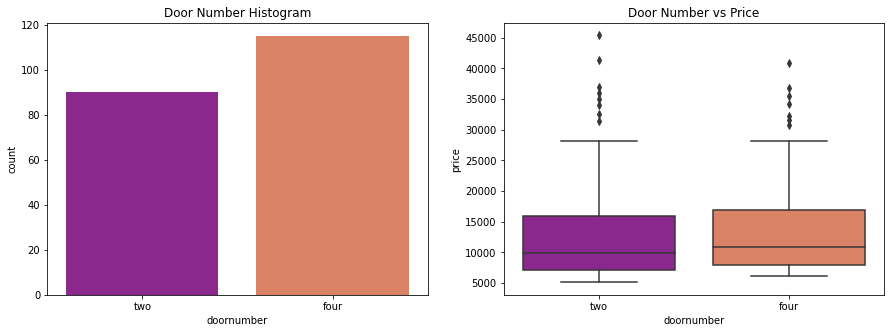

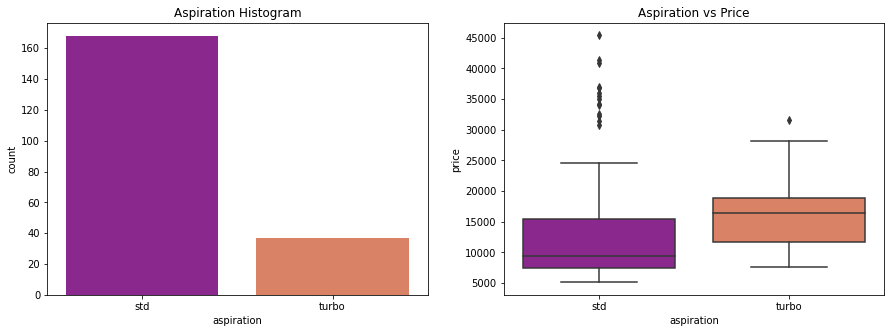

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(cars.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=cars.doornumber, y=cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(cars.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price, palette=("plasma"))

plt.show()

Hasil :
1. variabel doornumber tidak terlalu mempengaruhi harga. Tidak ada perbedaan yang signifikan antara kategori di dalamnya.
2. Tampaknya aspirasi dengan turbo memiliki kisaran harga yang lebih tinggi daripada std (meskipun memiliki beberapa nilai tinggi di luar kumis.)

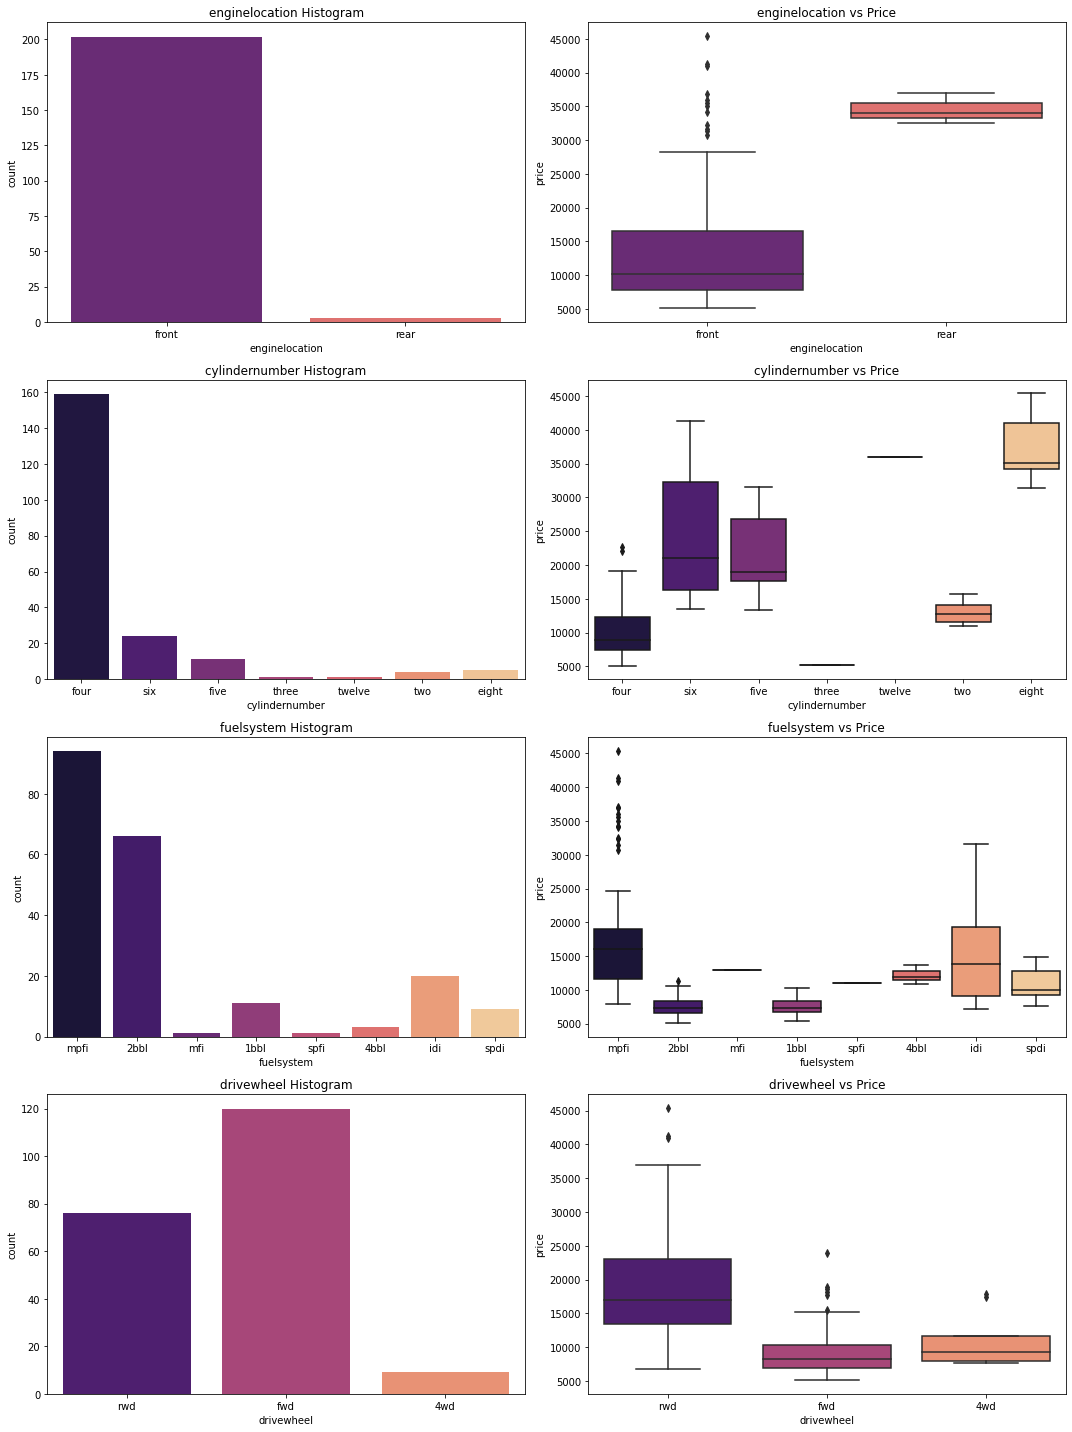

In [19]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(cars[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

Hasil :
1. Sangat sedikit titik data untuk kategori lokasi mesin untuk membuat kesimpulan.
2. Jumlah silinder yang paling umum adalah empat, enam dan lima. Padahal delapan silinder memiliki kisaran harga tertinggi.
3. mpfi dan 2bbl adalah jenis sistem bahan bakar yang paling umum. mpfi dan idi memiliki kisaran harga tertinggi. Tetapi ada beberapa data untuk kategori lain untuk mendapatkan kesimpulan yang berarti
4. Perbedaan yang sangat signifikan pada kategori roda penggerak. Sebagian besar mobil dengan kisaran tinggi tampaknya lebih menyukai roda penggerak rwd.

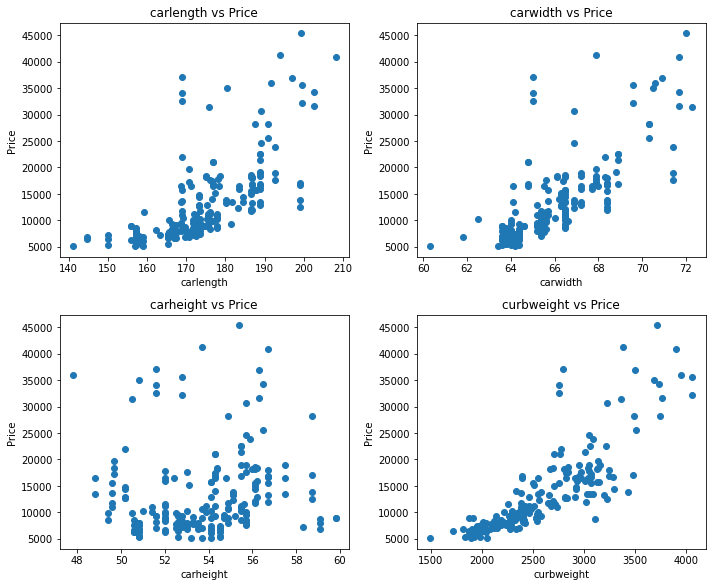

In [20]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

Hasil :
1. carwidth, carlength dan curbweight tampaknya memiliki korelasi positif dengan harga.
2. carheight tidak menunjukkan tren yang signifikan dengan harga.

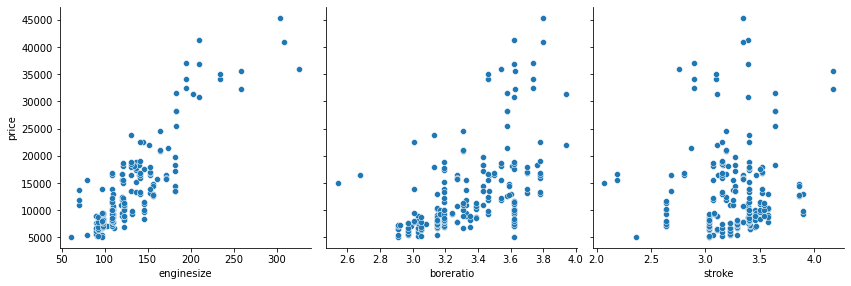

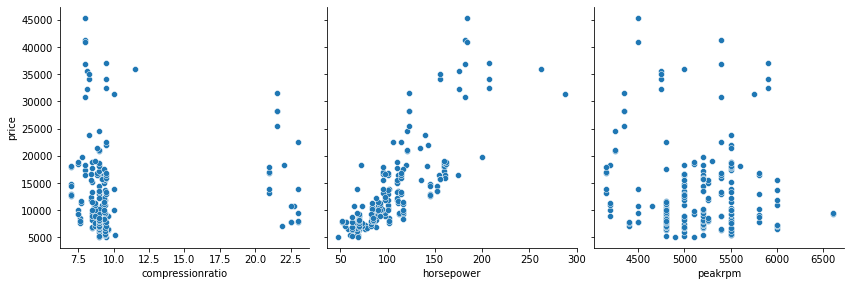

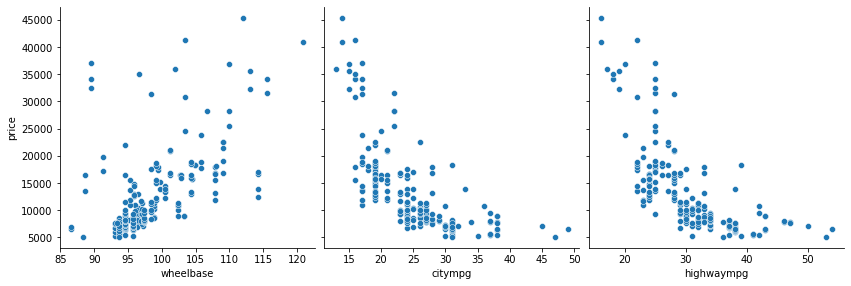

In [21]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

Hasil :
1. enginesize, boreratio, horsepower, wheelbase - tampaknya memiliki korelasi positif yang signifikan dengan harga.
2. citympg, highwaympg - tampaknya memiliki korelasi negatif yang signifikan dengan harga.

In [22]:
np.corrcoef(cars['carlength'], cars['carwidth'])[0, 1]

0.841118268481846

**Step 4 : Deriving new features**

In [23]:
#Fuel economy
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

In [24]:
#Binning Perusahaan Mobil berdasarkan harga rata-rata masing-masing Perusahaan.
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


**Step 5 : Bivariate Analysis**

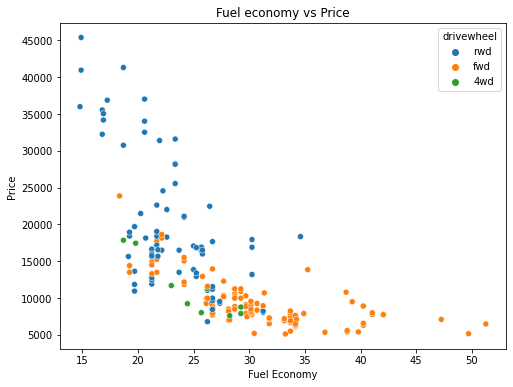

<Figure size 432x288 with 0 Axes>

In [25]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=cars['fueleconomy'],y=cars['price'],hue=cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

fueleconomy memiliki korelasi negatif yang jelas dengan harga dan signifikan.

<Figure size 1800x432 with 0 Axes>

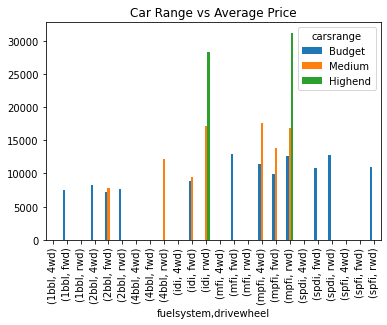

In [26]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

Mobil jarak jauh lebih memilih roda penggerak rwd dengan sistem bahan bakar idi atau mpfi.

**List of significant variables after Visual analysis :**

- Car Range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy 

In [27]:
cars_lr = cars[['price', 'carsrange', 'enginetype', 'fueltype', 'carbody', 'aspiration', 'cylindernumber', 'drivewheel',
               'curbweight', 'carlength', 'carwidth', 'enginesize', 'boreratio', 'horsepower', 'wheelbase', 'fueleconomy']]
cars_lr.head()

,price,carsrange,enginetype,fueltype,carbody,aspiration,cylindernumber,drivewheel,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,fueleconomy
0,13495,Medium,dohc,gas,convertible,std,four,rwd,2548,168.8,64.1,130,3.47,111,88.6,23.70
1,16500,Medium,dohc,gas,convertible,std,four,rwd,2548,168.8,64.1,130,3.47,111,88.6,23.70
2,16500,Medium,ohcv,gas,hatchback,std,six,rwd,2823,171.2,65.5,152,2.68,154,94.5,22.15
3,13950,Medium,ohc,gas,sedan,std,four,fwd,2337,176.6,66.2,109,3.19,102,99.8,26.70
4,17450,Medium,ohc,gas,sedan,std,five,4wd,2824,176.6,66.4,136,3.19,115,99.4,19.80


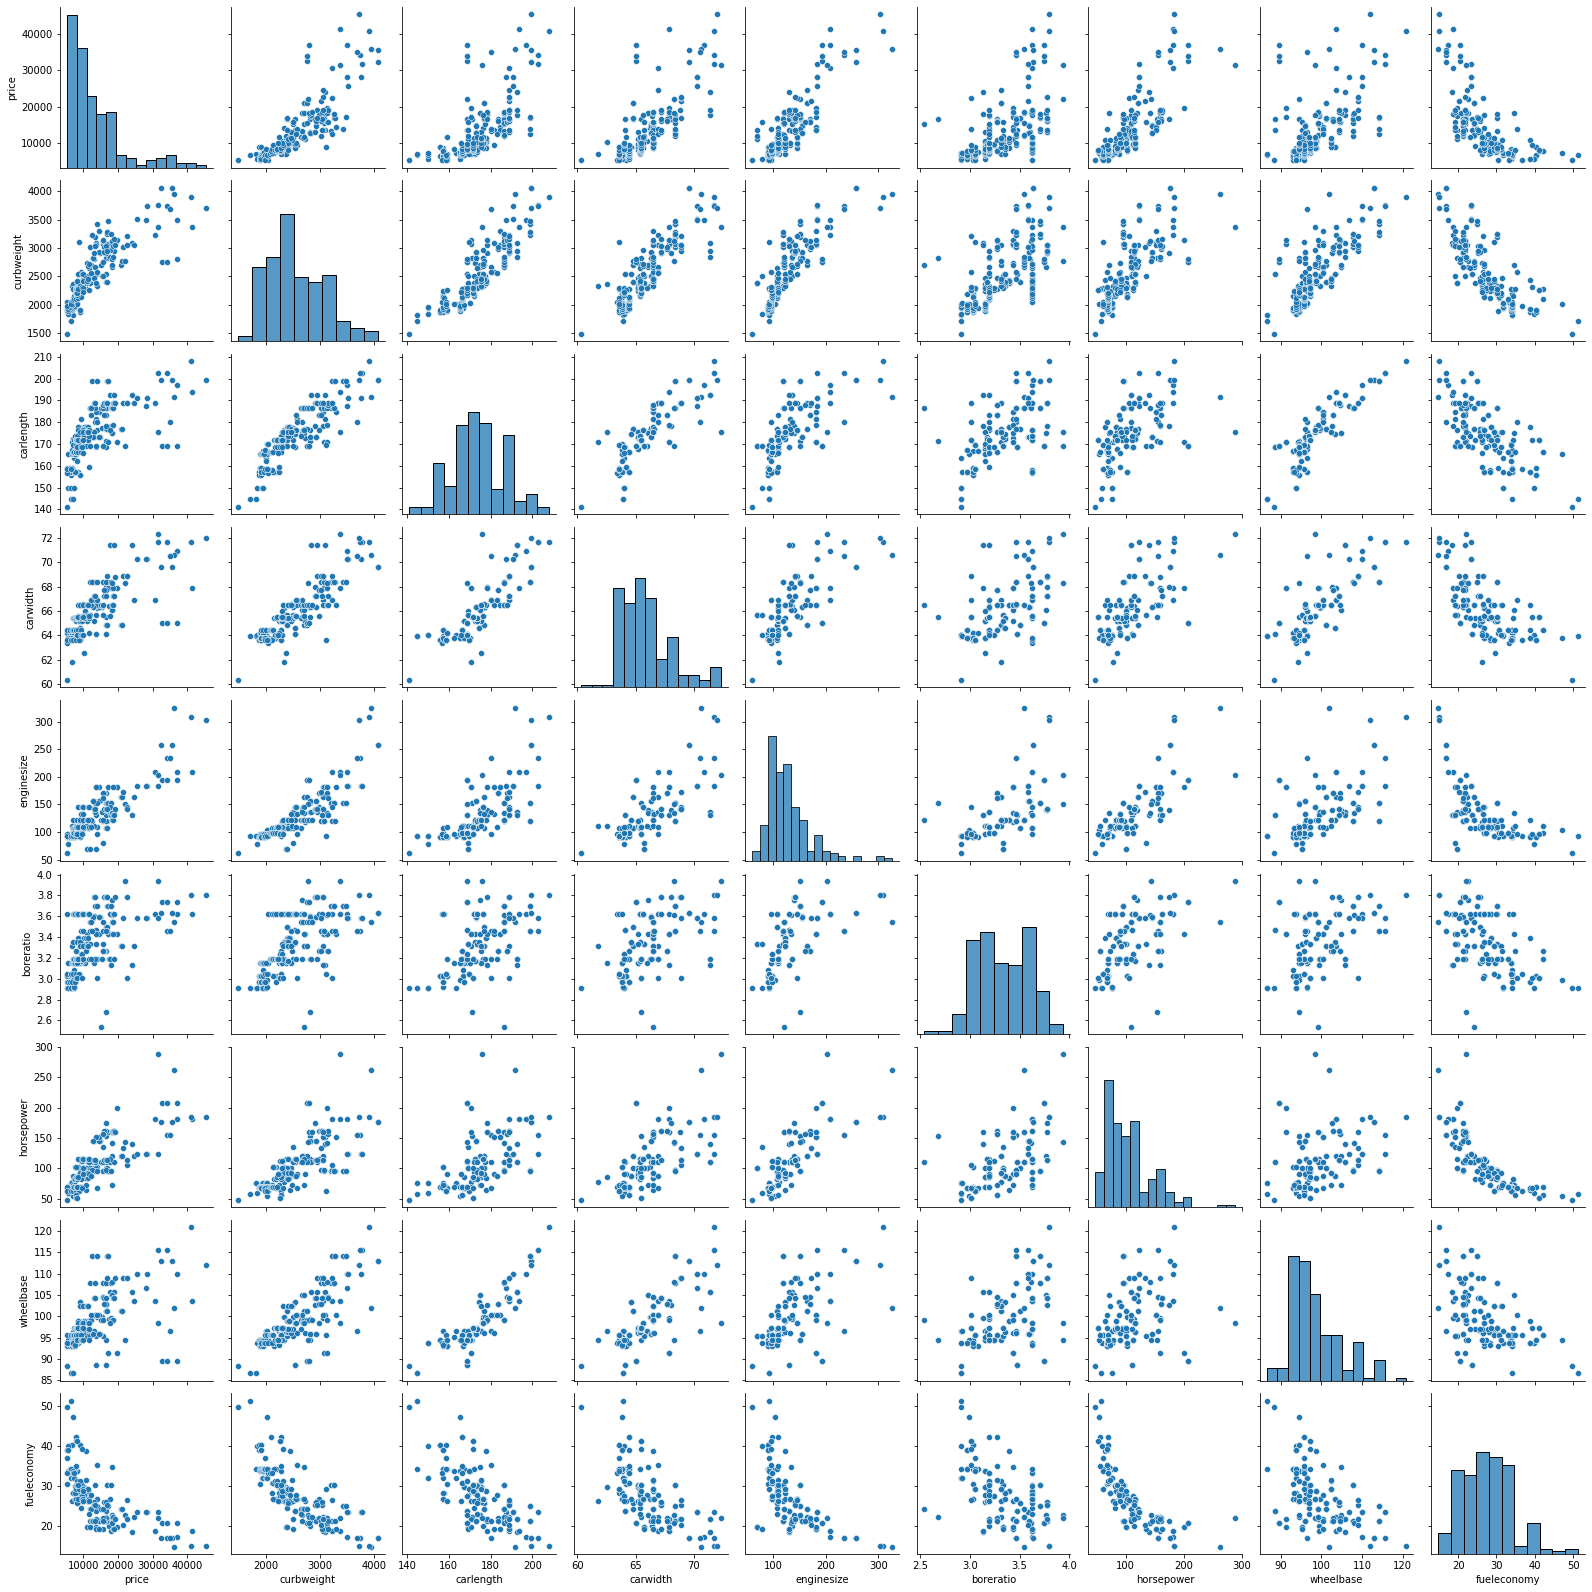

In [28]:
sns.pairplot(cars_lr)
plt.show()

**Step 6 : Dummy Variables**

In [29]:
#mengubah data categoric menjadi dummy
def dummies(x, df) :
    temp = pd.get_dummies(df[x], drop_first=True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis=1, inplace=True)
    return df

#apply function ke cars_lr
cars_lr = dummies('fueltype', cars_lr)
cars_lr = dummies('aspiration', cars_lr)
cars_lr = dummies('carbody', cars_lr)
cars_lr = dummies('drivewheel', cars_lr)
cars_lr = dummies('enginetype', cars_lr)
cars_lr = dummies('cylindernumber', cars_lr)
cars_lr = dummies('carsrange', cars_lr)

cars_lr.head()

,price,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,fueleconomy,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,2548,168.8,64.1,130,3.47,111,88.6,23.70,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,2548,168.8,64.1,130,3.47,111,88.6,23.70,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,2823,171.2,65.5,152,2.68,154,94.5,22.15,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,2337,176.6,66.2,109,3.19,102,99.8,26.70,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,2824,176.6,66.4,136,3.19,115,99.4,19.80,1,...,0,0,1,0,0,0,0,0,1,0


In [30]:
cars_lr.shape

(205, 31)

**Step 7 : Train-Test Split and feature scaling**

In [31]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state=100)

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'fueleconomy', 'carlength', 'carwidth', 'price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [33]:
df_train.head()

,price,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,fueleconomy,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.068818,0.272692,0.426016,0.291667,0.139623,0.230159,0.083333,0.244828,0.530864,1,...,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.500388,0.452033,0.666667,0.339623,1.000000,0.395833,0.272414,0.213992,1,...,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.314973,0.448780,0.308333,0.139623,0.444444,0.266667,0.272414,0.344307,1,...,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.411171,0.450407,0.316667,0.260377,0.626984,0.262500,0.068966,0.244170,1,...,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.647401,0.775610,0.575000,0.260377,0.746032,0.475000,0.610345,0.122085,1,...,0,0,0,1,0,0,0,0,1,0


In [34]:
df_train.shape

(143, 31)

In [35]:
df_train.describe()

,price,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,fueleconomy,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.407878,0.525476,0.461655,0.241351,0.497946,0.227302,0.411141,0.358265,0.909091,...,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.215682,0.211269,0.204848,0.184517,0.154619,0.207140,0.165511,0.205581,0.185980,0.288490,...,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.245539,0.399187,0.304167,0.135849,0.305556,0.091667,0.272414,0.198903,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.355702,0.502439,0.425000,0.184906,0.500000,0.191667,0.341379,0.344307,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.559542,0.669919,0.550000,0.301887,0.682540,0.283333,0.503448,0.512346,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


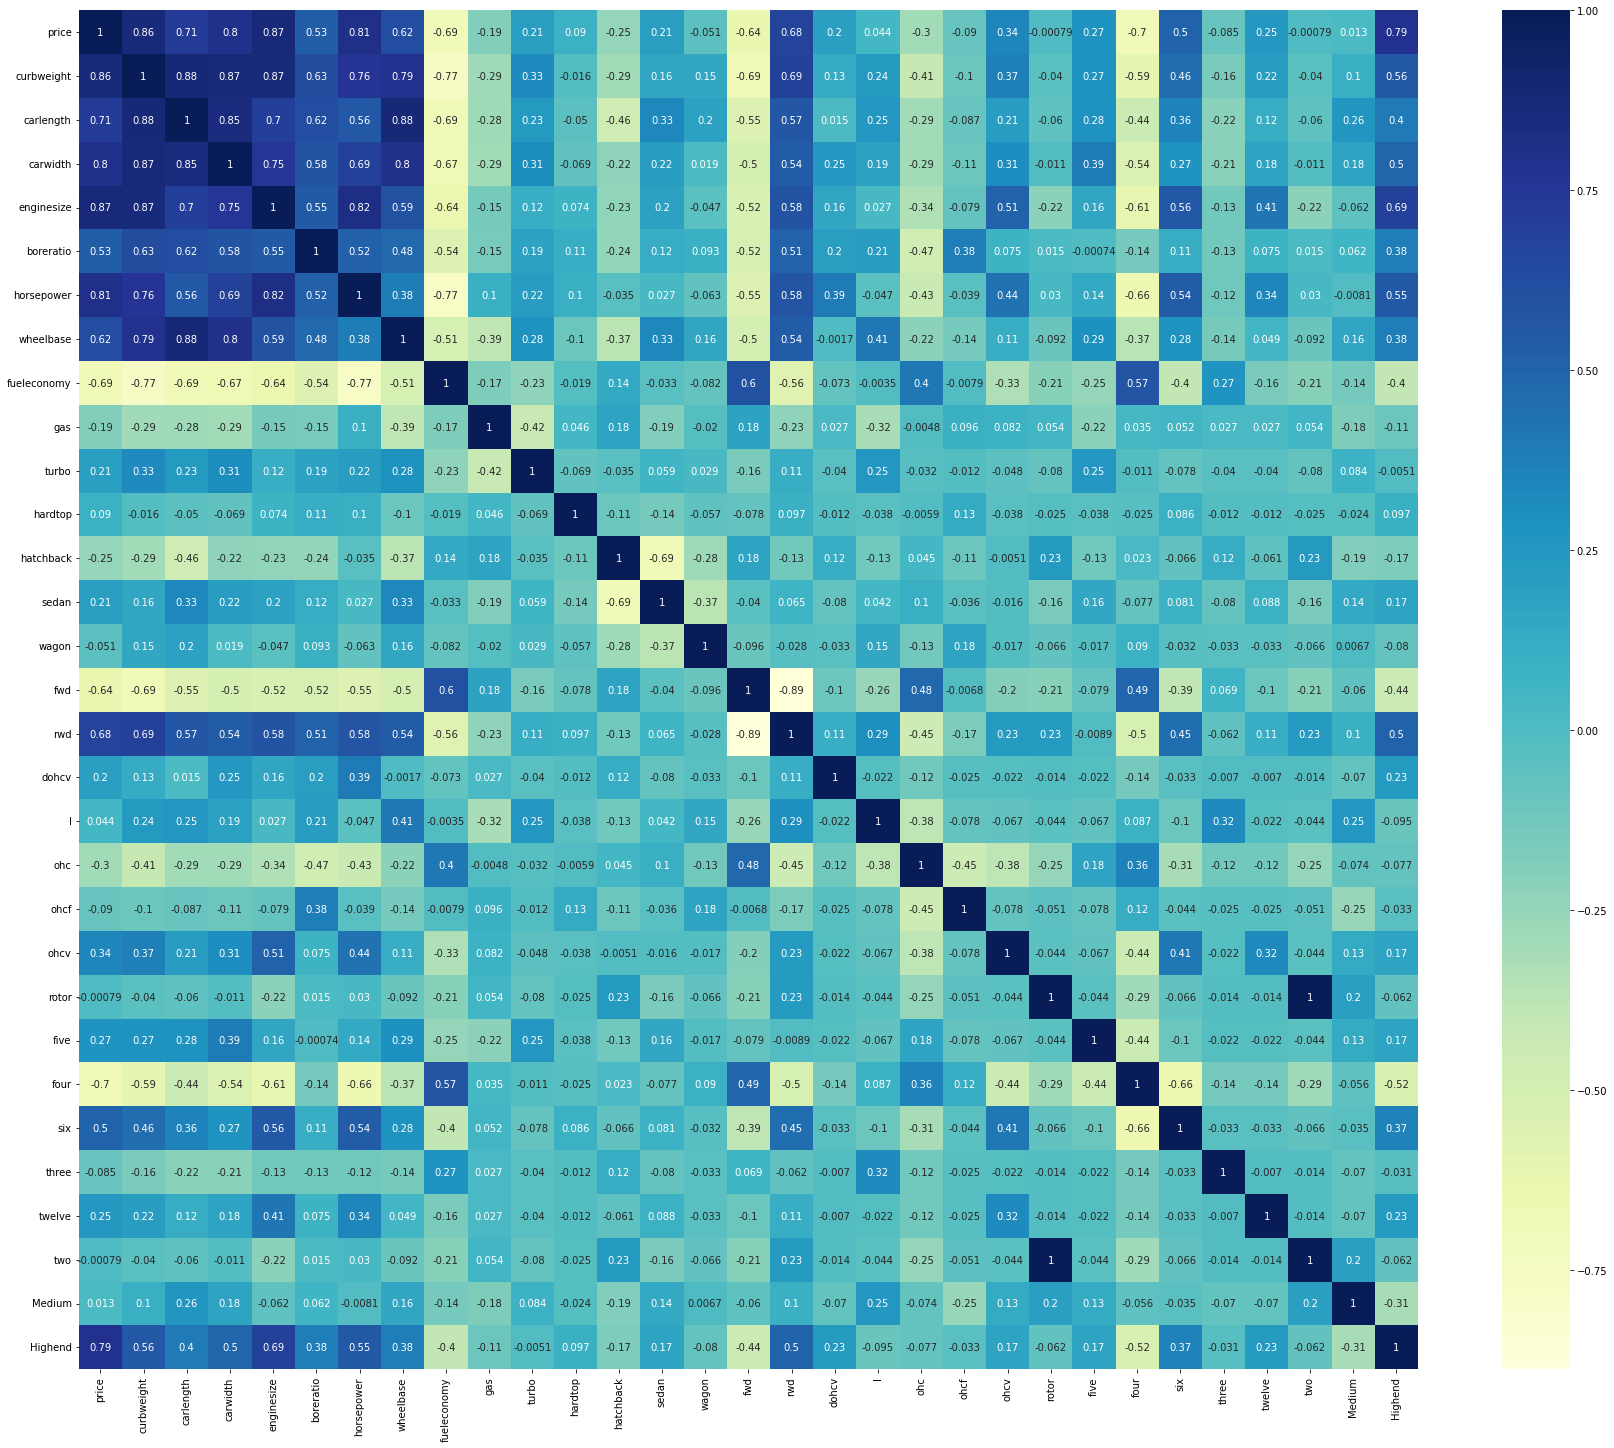

In [36]:
#correlation matrix dengan hitmap
plt.figure(figsize = (30,25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Variabel yang sangat berkorelasi dengan harga adalah curbweight, enginesize, horsepower,carwidth and highend.

In [37]:
#Membagi data menjadi variabel X dan y
y_train = df_train.pop('price')
x_train = df_train

**Step 8 : Model Building**

In [51]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
lm = LinearRegression()
lm.fit(x_train,y_train)
rfe = RFE(lm, n_features_to_select = 10)
rfe = rfe.fit(x_train, y_train)

In [53]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('curbweight', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('wheelbase', False, 3),
 ('fueleconomy', True, 1),
 ('gas', False, 17),
 ('turbo', False, 18),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 20),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 21),
 ('Medium', False, 12),
 ('Highend', True, 1)]

In [54]:
x_train.columns[rfe.support_]

Index(['curbweight', 'carwidth', 'horsepower', 'fueleconomy', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

**Building model menggunakan statsmodel, untuk detail secara statistik**

In [55]:
x_train_rfe = x_train[x_train.columns[rfe.support_]]
x_train_rfe.head()

,curbweight,carwidth,horsepower,fueleconomy,hatchback,sedan,wagon,dohcv,twelve,Highend
122,0.272692,0.291667,0.083333,0.530864,0,1,0,0,0,0
125,0.500388,0.666667,0.395833,0.213992,1,0,0,0,0,1
166,0.314973,0.308333,0.266667,0.344307,1,0,0,0,0,0
1,0.411171,0.316667,0.262500,0.244170,0,0,0,0,0,0
199,0.647401,0.575000,0.475000,0.122085,0,0,1,0,0,0


In [56]:
def build_model(x,y) :
    x = sm.add_constant(x)
    lm = sm.OLS(y, x).fit()
    print(lm.summary())
    return x

def checkVIF(x) :
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factors(x.values, i) for i in range (x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return(vif)

**MODEL 1**

In [57]:
x_train_new = build_model(x_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           1.29e-70
Time:                        13:14:49   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0947      0.042     -2.243      

Hilangkan variabel yang memiliki nilai probability > 0.05, dalam hal ini kolom ''twelve''

In [58]:
x_train_new = x_train_rfe.drop(['twelve'], axis=1)

**MODEL 2**

In [59]:
x_train_new = build_model(x_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           4.25e-71
Time:                        13:14:49   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0764      0.041     -1.851      

In [60]:
x_train_new = x_train_new.drop(['fueleconomy'], axis=1)

**MODEL 3**

In [61]:
x_train_new = build_model(x_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           7.85e-72
Time:                        13:14:50   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [66]:
# Check VIF
vif_data = pd.DataFrame()
vif_data["feature"] = x_train_new.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_train_new.values, i)
                          for i in range(len(x_train_new.columns))]
  
print(vif_data)

      feature        VIF
0       const  26.896506
1  curbweight   8.103943
2    carwidth   5.135808
3  horsepower   3.605422
4   hatchback   5.630407
5       sedan   6.072576
6       wagon   3.575192
7       dohcv   1.457888
8     Highend   1.633750


In [67]:
x_train_new = x_train_new.drop(['curbweight'], axis=1)

**MODEL 4**

In [68]:
x_train_new = build_model(x_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           4.70e-70
Time:                        13:22:46   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [71]:
# Check VIF
vif_data = pd.DataFrame()
vif_data["feature"] = x_train_new.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_train_new.values, i)
                          for i in range(len(x_train_new.columns))]
  
print(vif_data)

      feature        VIF
0       const  26.891384
1    carwidth   2.220380
2  horsepower   2.503856
3   hatchback   5.538711
4       sedan   6.058536
5       wagon   3.470879
6       dohcv   1.213703
7     Highend   1.559824


In [72]:
x_train_new = x_train_new.drop(['sedan'], axis=1)

**MODEL 5**

In [73]:
x_train_new = build_model(x_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           1.68e-69
Time:                        13:24:22   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

In [74]:
# Check VIF
vif_data = pd.DataFrame()
vif_data["feature"] = x_train_new.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_train_new.values, i)
                          for i in range(len(x_train_new.columns))]
  
print(vif_data)

      feature        VIF
0       const  10.822969
1    carwidth   2.086193
2  horsepower   2.391970
3   hatchback   1.230620
4       wagon   1.109949
5       dohcv   1.210894
6     Highend   1.554024


In [75]:
x_train_new = x_train_new.drop(['wagon'], axis=1)

**MODEL 6**

In [76]:
x_train_new = build_model(x_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           1.57e-70
Time:                        13:25:52   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [77]:
# Check VIF
vif_data = pd.DataFrame()
vif_data["feature"] = x_train_new.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_train_new.values, i)
                          for i in range(len(x_train_new.columns))]
  
print(vif_data)

      feature        VIF
0       const  10.394373
1    carwidth   2.084811
2  horsepower   2.390484
3   hatchback   1.127363
4       dohcv   1.209098
5     Highend   1.532369


**MODEL 7**

In [78]:
x_train_new = x_train_new.drop(['dohcv'], axis=1)
x_train_new = build_model(x_train_new, y_train)

# Check VIF
vif_data = pd.DataFrame()
vif_data["feature"] = x_train_new.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_train_new.values, i)
                          for i in range(len(x_train_new.columns))]
  
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           1.04e-67
Time:                        13:27:38   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

**RESIDUAL ANALYSIS MODEL**

In [79]:
lm = sm.OLS(y_train, x_train_new).fit()
y_train_price = lm.predict(x_train_new)

Text(0.5, 0, 'Errors')

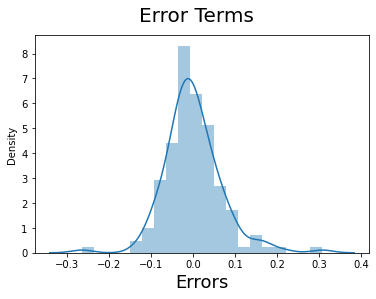

In [83]:
#buat histogram untuk melihat error pada model
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

**Prediction and Evaluation**

In [84]:
#Scaling test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'fueleconomy', 'carlength', 'carwidth', 'price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [85]:
#Buat x dan y variables
y_test = df_test.pop('price')
x_test = df_test

In [86]:
#Gunakan model untuk membuat prediksi
x_train_new = x_train_new.drop('const', axis=1)
#Buat x_test_new dataframe berdasasrkan x_test
x_test_new = x_test[x_train_new.columns]

#Masukan constan variables
x_test_new = sm.add_constant(x_test_new)

In [87]:
#Buat prediksi
y_predict = lm.predict(x_test_new)

**Evaluasi perbandingan antara x_test dengan y_pred**

In [89]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.8614595209022029

In [94]:
from sklearn import metrics

print("MAE:", metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 0.06315428156135228
MSE: 0.006063362186256168
RMSE: 0.07786759394161455


Nilai MAE, MSE, RMSE kecil hal ini berarti bahwa nilai yang diprediski dekat dengan nilai yang diamati atau observasi, dan sebaliknya.

Text(0, 0.5, 'y_pred')

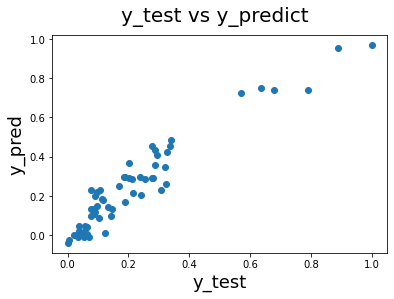

In [90]:
#Evaluasi model menggunakan plot
fig = plt.figure()
plt.scatter(y_test, y_predict)
fig.suptitle('y_test vs y_predict', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=18)

**Evaluasi model menggunakan statistics**

In [91]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           1.04e-67
Time:                        13:44:43   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

**Kesimpulan**

1. R-squared dan Adjust R-squared (tingkat kesesuaian) - 0,899 dan 0,896 - 90% varians dijelaskan.
2. F-stats dan Prob(F-stats) (kecocokan model secara keseluruhan) - 308.0 dan 1.04e-67(approx. 0.0) - Model fir signifikan dan menjelaskan 90% varians tidak hanya kebetulan.
3. p-values - p-values untuk semua koefisien tampaknya kurang dari tingkat signifikansi 0,05. - artinya semua prediktor signifikan secara statistik yang artinya berpengaruh nyata terhadap harga mobil.